# Seaborn examples
## Scatterplot

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
tips = sns.load_dataset("tips")

In [58]:
tips.sort_values(['tip']).head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2


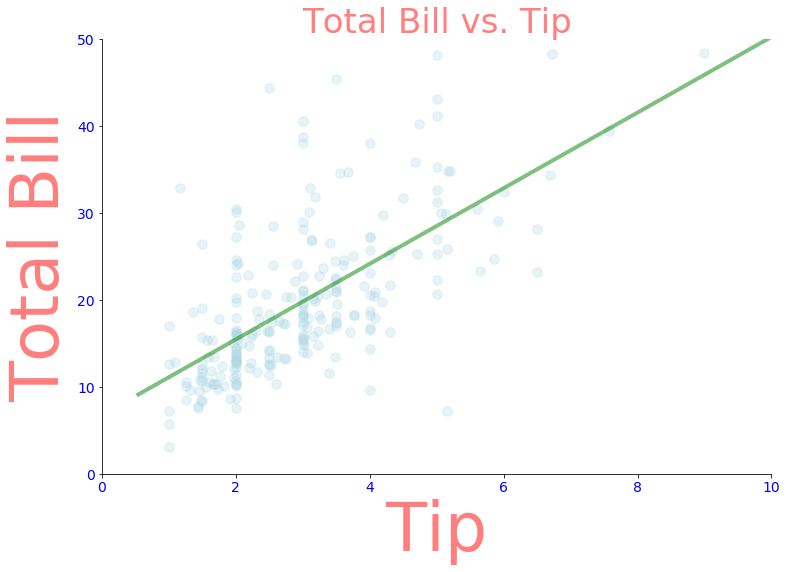

In [7]:
# http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/

# "ci" to remove confidence interval
# "marker" to have a x as marker.
# "scatter_kws" to provide style info for the points.[s for size]
# "line_kws" to provide style info for the line.[lw for line width]
g = sns.regplot(x="tip", y="total_bill", data=tips, ci = False,
    scatter_kws={"color":"lightblue","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="o")

# remove the top and right line in graph
sns.despine()

# gridlines darkgrid, whitegrid, dark, white or ticks
sns.set_style("whitegrid")

# Set the size of the graph from here
g.figure.set_size_inches(12,8)

# Set the Title of the graph from here
g.axes.set_title('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)

# Set the xlabel of the graph from here
g.set_xlabel("Tip",size = 67,color="r",alpha=0.5)

# Set the ylabel of the graph from here
g.set_ylabel("Total Bill",size = 67,color="r",alpha=0.5)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="blue")

# set limits
g.set(ylim=(0, 50), xlim=(0,10))

# show figure
plt.show()


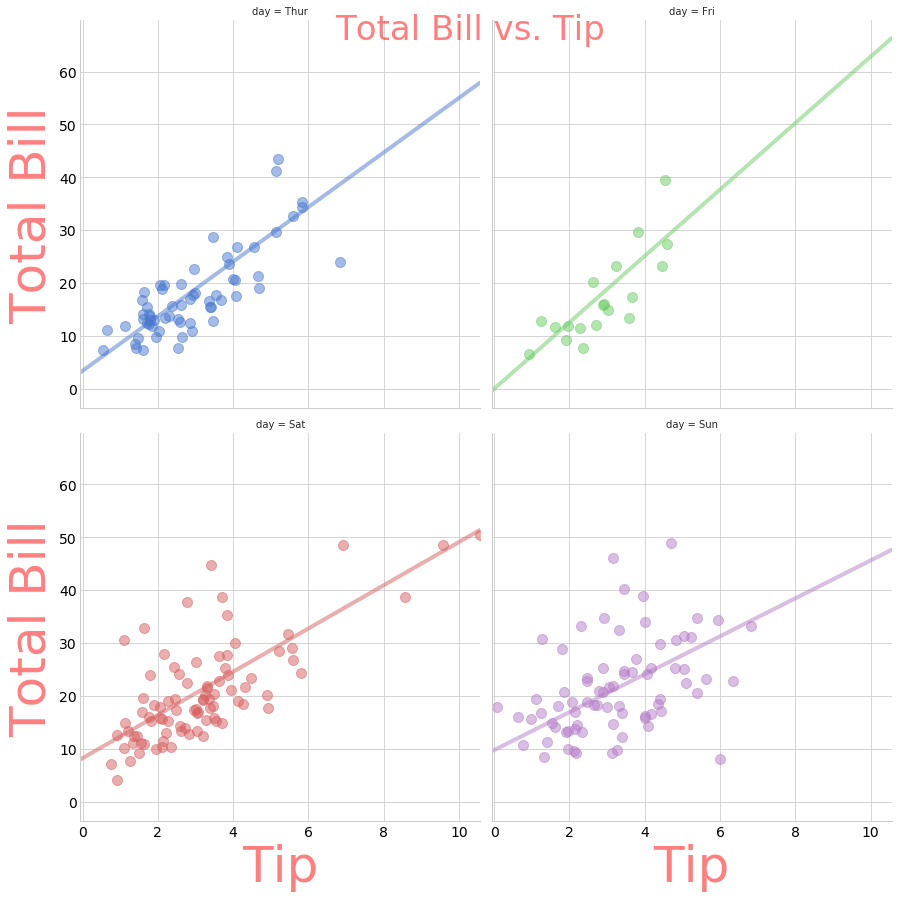

In [8]:
# http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/

# this function creates a faceted plot.

# col : divides the data points into days and creates that many plots
# palette: deep, muted, pastel, bright, dark, and colorblind. change the colors in graph. Experiment with these
# col_wrap: we want 2 graphs in a row? Yes.We do
# scatter_kws: attributes for points
# hue: (optional) map plot aspects to different colors
# size: controls the size of graph

g = sns.lmplot(x="tip", y="total_bill",ci=None,data=tips, col="day",
    palette="muted",col_wrap=2,scatter_kws={"s": 100,"alpha":.5},
    line_kws={"lw":4,"alpha":0.5},hue="day",x_jitter=1.0,y_jitter=1.0,size=6)

# remove the top and right line in graph
sns.despine()

# Additional line to adjust some appearance issue
#plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)

# Set the xlabel of the graph from here
g.set_xlabels("Tip",size = 50,color="r",alpha=0.5)

# Set the ylabel of the graph from here
g.set_ylabels("Total Bill",size = 50,color="r",alpha=0.5)

# Set the ticklabel size and color of the graph from here
titles = ['Thursday','Friday','Saturday','Sunday']
for ax,title in zip(g.axes.flat,titles):
    ax.tick_params(labelsize=14,labelcolor="black")

plt.show()

## Barplot

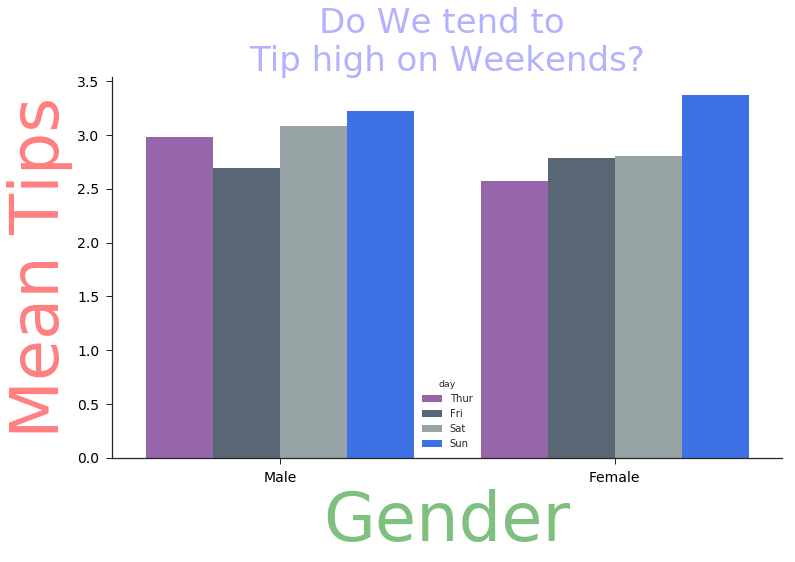

In [9]:
# http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/

sns.set()
sns.set(style="ticks")

# custom palette
flatui = ["#9b59b6", "#556677", "#95a5a6", "#2266FF", "#00495e", "#2ecc71"]

# This Function takes as input a custom palette
g = sns.barplot(x="sex", y="tip", hue="day",
    palette=sns.color_palette(flatui),data=tips,ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)

# Set the Title of the graph from here
g.axes.set_title('Do We tend to \nTip high on Weekends?',
    fontsize=34,color="b",alpha=0.3)

# Set the xlabel of the graph from here
g.set_xlabel("Gender",size = 67,color="g",alpha=0.5)

# Set the ylabel of the graph from here
g.set_ylabel("Mean Tips",size = 67,color="r",alpha=0.5)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")
plt.show()


## Histogram


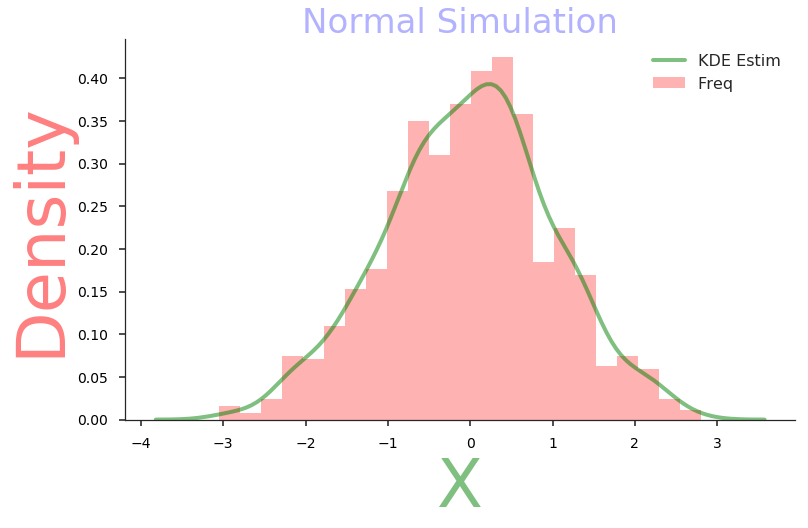

In [24]:

sns.set()
# Create a list of 1000 Normal RVs
x = np.random.normal(size=1000)

sns.set_context("poster")
sns.set_style("ticks")
# This  Function creates a normed Histogram by default.
# If we use the parameter kde=False and norm_hist=False then
# we will be using a count histogram

g=sns.distplot(x,kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)

# Set the Title of the graph from here
g.axes.set_title('Normal Simulation', fontsize=34,color="b",alpha=0.3)

# Set the xlabel of the graph from here
g.set_xlabel("X",size = 67,color="g",alpha=0.5)

# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")
plt.show()

In [ ]:
# https://stackoverflow.com/questions/29788246/using-distplot-in-python#29790498

sns.set()

fig, axs = plt.subplots(figsize=(6,6), ncols=2, nrows=2)
data = np.random.randint(0,20,40)


# kde =  kernel density estimates / row

for row in (0,1):
    for col in (0,1):
        sns.distplot(data, kde=row, norm_hist=col, ax=axs[row, col])

axs[0,0].set_ylabel('NO kernel density')
axs[1,0].set_ylabel('KDE on')
axs[1,0].set_xlabel('norm_hist=False')
axs[1,1].set_xlabel('norm_hist=True')
plt.show()

## PairPlots

In [14]:
# http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


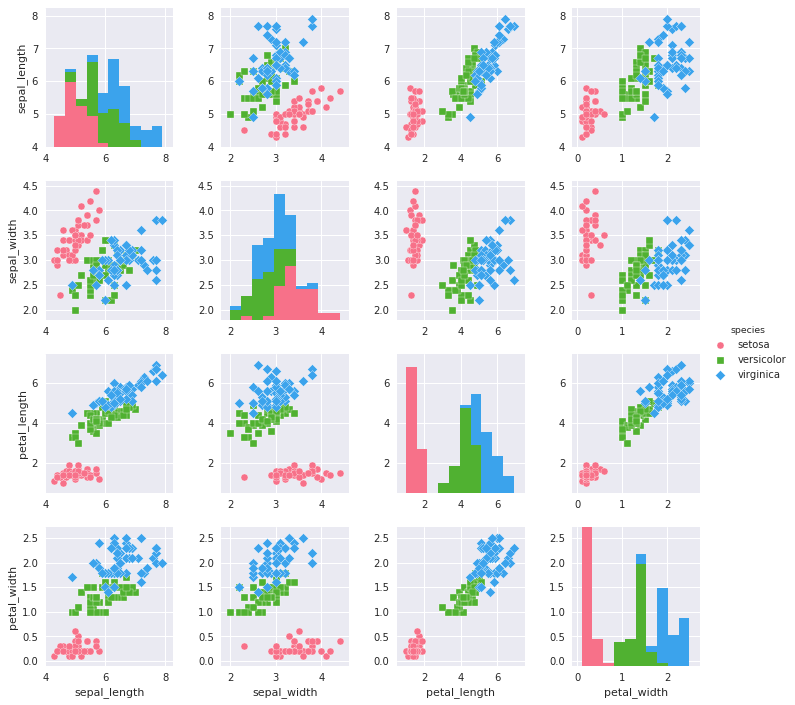

In [15]:
# Show different levels of a categorical 
# variable by the color of plot elements:

# dropna : Drop missing values from the data before plotting
# palette: use special palette
# hue: Variable in data to map plot aspects to different colors

g = sns.pairplot(iris, hue="species", dropna=True, palette="husl",
                 markers=["o", "s", "D"])
plt.show()

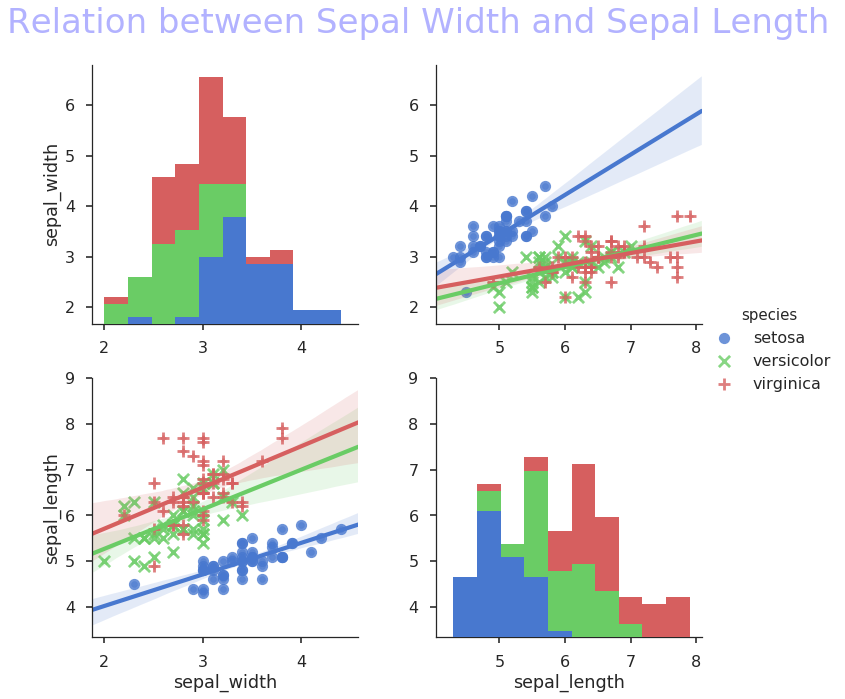

In [30]:
# vars -> plots subset of variable

# Plot different 'vars' in the rows and columns
g = sns.pairplot(iris, hue="species",palette="muted",size=5,                #diag_kind="kde",
    vars=["sepal_width", "sepal_length"],kind='reg',markers=['o','x','+']) #kind=scatter/reg

# To change the size of the scatterpoints in graph
g = g.map_offdiag(plt.scatter,  s=35,alpha=0.5)

# remove the top and right line in graph
sns.despine()

# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Relation between Sepal Width and Sepal Length',
    fontsize=34,color="b",alpha=0.3)

plt.show()

## PairGrid

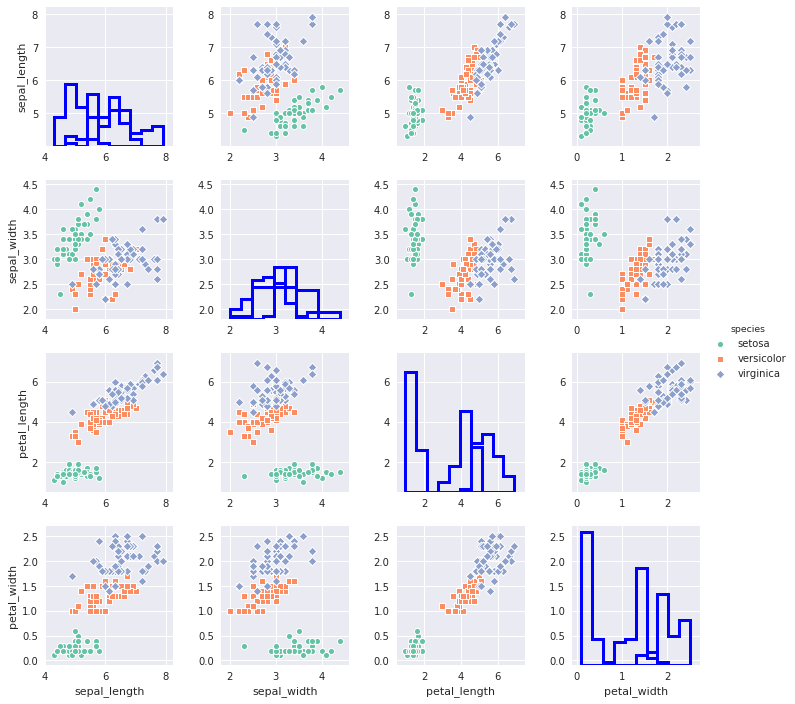

In [17]:
# https://seaborn.pydata.org/generated/seaborn.PairGrid.html

# Subplot grid for plotting pairwise relationships in a dataset.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # import seaborn and reset

# load test dataset
iris = sns.load_dataset("iris")

#Use different colors and markers for each categorical level
g = sns.PairGrid(iris, hue="species", palette="Set2",
                 hue_kws={"marker": ["o", "s", "D"]})

#g = g.map_upper(plt.scatter)                    # upper and
#g = g.map_lower(sns.kdeplot, cmap="Blues_d")    # lower diagrams have different functions

g = g.map_diag(plt.hist, histtype="step", linewidth=3, edgecolor="b") # histtype = "step"
g = g.map_offdiag(plt.scatter,  linewidths=1, edgecolor="w", s=38, marker="x") # s = size of plots
g = g.add_legend() # add "texts"

plt.show()

## FacetGrid

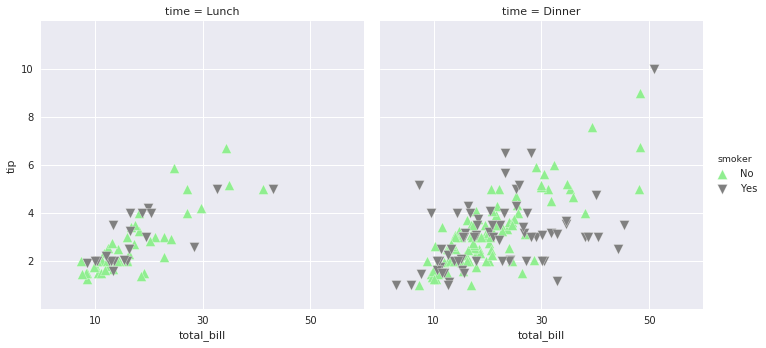

In [81]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# In particular, FacetGrid is used to draw plots with multiple Axes where 
# each Axes shows the same relationship conditioned on different levels 
# of some variable. It’s possible to condition on up to three variables.

tips = sns.load_dataset("tips")
sns.set()

# use a dict mapping hue levels to colors
pal = dict(No="lightgreen", Yes="gray")

# hue_kws = different markers to different hue levels
g = sns.FacetGrid(tips, col="time",  hue="smoker", palette=pal, hue_order=["No","Yes"],
                  hue_kws=dict(marker=["^", "v"]), col_wrap=2, size=5)

g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w", s=100) # s = size of dots
     .set(xlim=(0, 60), ylim=(0, 12),xticks=[10, 30, 50], yticks=[2,4,6,8,10]).add_legend())

plt.show()

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## kdeplot (with facetgrid)

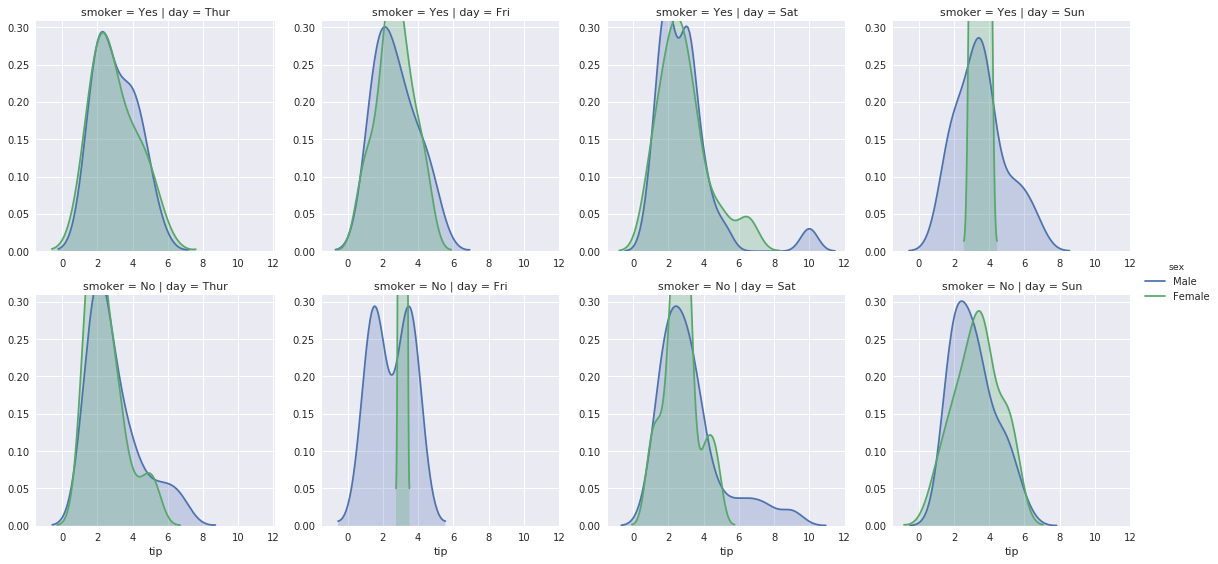

In [107]:
# KDE  =  kernel density plot 

tips = sns.load_dataset("tips")
sns.set()

# tips / smokers & day / hue "sex" in different colors
g = sns.FacetGrid(tips, col="day", row="smoker", hue="sex", size=4)
g.map(sns.kdeplot, "tip", shade=True)

# style
sns.set_style("dark")

# no "spines"
sns.despine(left=True, bottom=True)

# show male/female
g.add_legend() 
plt.show()

## scipy probability

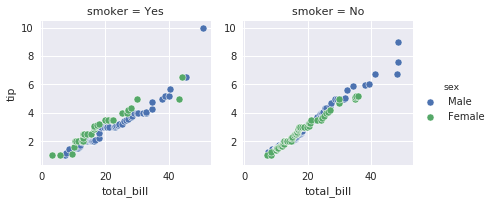

In [19]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

from scipy import stats

# Define a custom bivariate function to map onto the grid
#
# (In statistics, a Q–Q (quantile-quantile) plot is a probability plot, 
# which is a graphical method for comparing two probability 
# distributions by plotting their quantiles against
# each other.) Https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    
    
# arguments to qqplot-function    
kws = dict(s=50, linewidth=.5, edgecolor="w")
    
    
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g = (g.map(qqplot, "total_bill", "tip", **kws).add_legend())

plt.show()

### Visualizations with titanic data 

In [46]:
# https://www.kaggle.com/rajan0921/titanic-solution

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# load dataframe of passengers
train = pd.read_csv('http://bit.ly/kaggletrain')

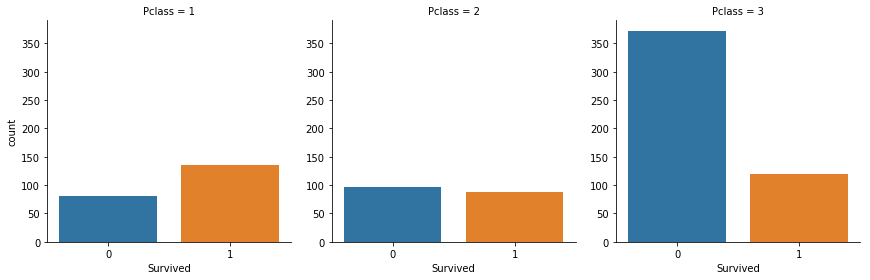

In [47]:
# group by gender
train.groupby(['Sex']).count()

# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split 
#faceted) over the feature 'Pclass'
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train);
plt.show()

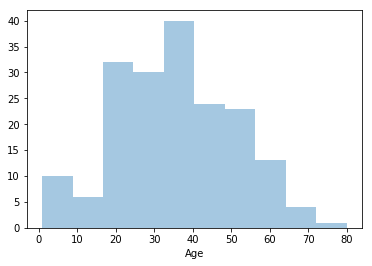

In [48]:
# Use seaborn to plot a histogram of the 'Age' column of df_train. You'll need to 
# drop null values before doing so

train_drop = train.dropna()
sns.distplot(train_drop.Age, kde=False);
plt.show()

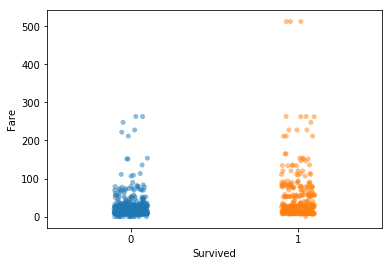

In [49]:
# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=train, alpha=0.5, jitter=True);
plt.show()

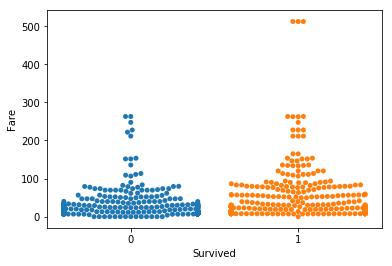

In [50]:
# swarmplot = Draw a categorical scatterplot with non-overlapping points.

sns.swarmplot(x='Survived', y='Fare', data=train);
plt.show()

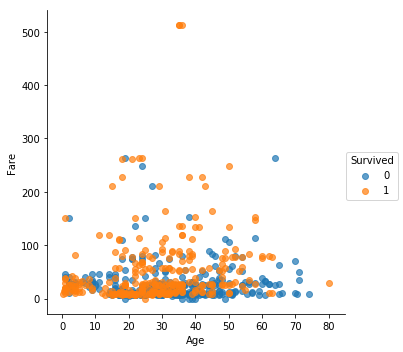

In [51]:
# Use seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha':0.7});
plt.show()

## functions

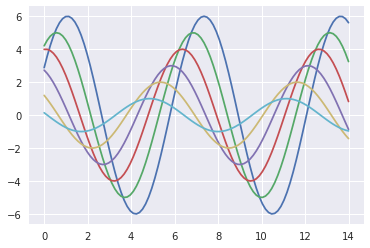

In [20]:
# https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set() # defaults

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sinplot()

plt.show()